In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df=pd.read_csv('full_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.shape

(4981, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [6]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [9]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [10]:
smoking=df.smoking_status.value_counts()

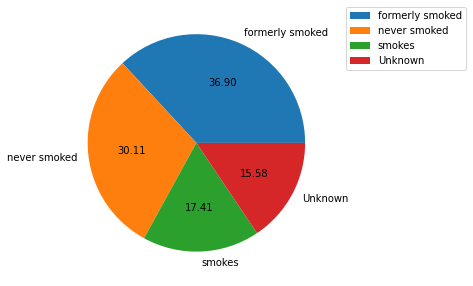

In [11]:
plt.figure(figsize=(15,5))
plt.pie(smoking,labels=['formerly smoked', 'never smoked', 'smokes', 'Unknown'],autopct='%.2f')
plt.legend(bbox_to_anchor=(1.05,1),loc='upper left',borderaxespad=0)
plt.show()

In [12]:
Age=df.age.value_counts().keys()
Age

Float64Index([78.0, 57.0, 54.0, 51.0, 79.0, 52.0, 53.0, 45.0, 55.0, 50.0,
              ...
              0.24, 1.56,  0.8, 0.64,  1.4, 1.16, 0.48,  0.4, 0.08, 0.16],
             dtype='float64', length=104)

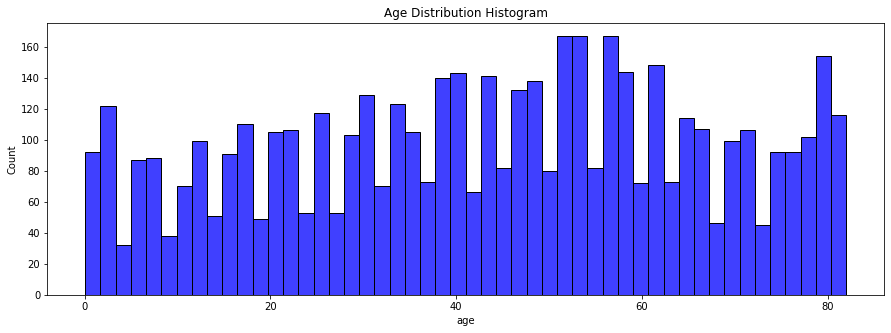

In [13]:
# sns.set_theme(color_codes=True)
# sns.set_theme(style='darkgrid')
plt.figure(figsize=(15,5))
sns.histplot(df['age'],bins=50,color='b')
plt.title('Age Distribution Histogram')
plt.show()

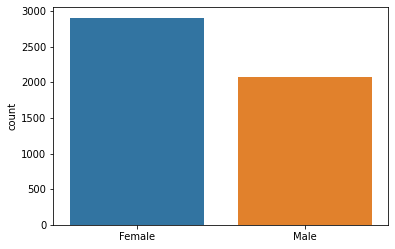

In [14]:
gen=df.gender.value_counts().keys()
count=df['gender'].value_counts().values
sns.barplot(data=df,x=gen,y=count)
plt.ylabel('count')
plt.show()

In [15]:
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children'], dtype=object)

In [16]:
df.select_dtypes(include='O').columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [17]:
X=df.drop('stroke',axis=1)
y=df.stroke

In [18]:
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

col=['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']

transformer=make_column_transformer((OneHotEncoder(),col),remainder='passthrough')
transformed=transformer.fit_transform(X)
transformed_df=pd.DataFrame(transformed,columns=transformer.get_feature_names_out())

In [20]:
transformed_df.head()

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__ever_married_No,onehotencoder__ever_married_Yes,onehotencoder__work_type_Govt_job,onehotencoder__work_type_Private,onehotencoder__work_type_Self-employed,onehotencoder__work_type_children,onehotencoder__Residence_type_Rural,onehotencoder__Residence_type_Urban,onehotencoder__smoking_status_Unknown,onehotencoder__smoking_status_formerly smoked,onehotencoder__smoking_status_never smoked,onehotencoder__smoking_status_smokes,remainder__age,remainder__hypertension,remainder__heart_disease,remainder__avg_glucose_level,remainder__bmi
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.6
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.5
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.4
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,186.21,29.0


In [21]:
transformed_df.shape

(4981, 19)

In [22]:
df2=pd.get_dummies(X,col)
df2.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,1,0,1,0,0,0,1,0,1,0,0
1,80.0,0,1,105.92,32.5,0,1,0,1,0,1,0,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0


In [23]:
X_train,X_test,y_train,y_test=train_test_split(transformed_df,y,stratify=y)

In [24]:
X_train.shape

(3735, 19)

In [25]:
X_test.shape

(1246, 19)

In [26]:
model=xgb.XGBClassifier(objective='binary:logistic',
                        max_depth=5,
                        learning_rate=0.01,
                        colsample_bytree=0.5,
                        n_estimators=1000
                        )
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [27]:
pred=model.predict(X_test)

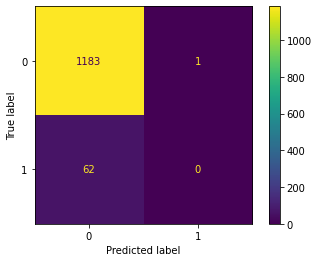

In [28]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

In [30]:
from sklearn.metrics import accuracy_score
results=accuracy_score(y_test,pred)
results

0.949438202247191

In [31]:
pred_dic={'y_test':y_test,'pred':pred}
decision=pd.DataFrame(pred_dic)

In [33]:
decision.head(10)

,y_test,pred
4194,0,0
1439,0,0
2756,0,0
4057,0,0
1508,0,0
2808,0,0
896,0,0
3427,0,0
2097,0,0
1904,0,0


In [55]:
decision.sample(10)

,y_test,pred
603,0,0
2205,0,0
2645,0,0
3513,0,0
570,0,0
2223,0,0
291,0,0
2996,0,0
1764,0,0
4707,0,0
